 # Tests on PDA

In [1]:
from jove.SystemImports import *
from jove.DotBashers    import *
from jove.Def_md2mc     import *
from jove.Def_PDA       import *

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(explore_pda)
help(run_pda)
help(classify_l_id_path)
help(h_run_pda)
help(interpret_w_eps)
help(step_pda)
help(suvivor_id)
help(term_id)
help(final_id)
help(cvt_str_to_sym)
help(is_surv_id)
help(subsumed)
help(is_term_id)
help(is_final_id)



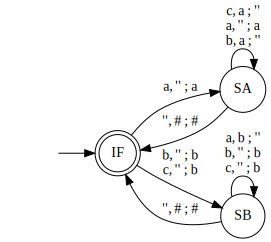

In [2]:
pda = md2mc('''
PDA 

IF : a, '' ; a -> SA  !! the first input can be an a, b, or c, and the stack will need to behave differently (stack can't be negative)
IF : b, '' ; b -> SB
IF : c, '' ; b -> SB

SA : a, '' ; a -> SA  !! when an a is encountered push to the stack
SA : b, a ; '' -> SA  !! when a b or c is encountered pop from the stack
SA : c, a ; '' -> SA
SA : '', # ; # -> IF  !! if the stack is empty then the abc's are balanced

SB : b, '' ; b -> SB  !! if b or c is encountered push to stack
SB : c, '' ; b -> SB
SB : a, b ; '' -> SB  !! if a is encountered, pop a b
SB : '', # ; # -> IF

''')
DOpda = dotObj_pda(pda, FuseEdges=True)
DOpda

My Tests:

In [3]:
explore_pda("aabc", pda)

String aabc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '#')
Reached as follows:
->  ('IF', 'aabc', '#')
->  ('SA', 'abc', 'a#')
->  ('SA', 'bc', 'aa#')
->  ('SA', 'c', 'a#')
->  ('SA', '', '#')
->  ('IF', '', '#') .


In [4]:
explore_pda("aaaaaabbbccc", pda)

String aaaaaabbbccc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '#')
Reached as follows:
->  ('IF', 'aaaaaabbbccc', '#')
->  ('SA', 'aaaaabbbccc', 'a#')
->  ('SA', 'aaaabbbccc', 'aa#')
->  ('SA', 'aaabbbccc', 'aaa#')
->  ('SA', 'aabbbccc', 'aaaa#')
->  ('SA', 'abbbccc', 'aaaaa#')
->  ('SA', 'bbbccc', 'aaaaaa#')
->  ('SA', 'bbccc', 'aaaaa#')
->  ('SA', 'bccc', 'aaaa#')
->  ('SA', 'ccc', 'aaa#')
->  ('SA', 'cc', 'aa#')
->  ('SA', 'c', 'a#')
->  ('SA', '', '#')
->  ('IF', '', '#') .


In [5]:
explore_pda("aabcaabcaabcaabc", pda)

String aabcaabcaabcaabc accepted by your PDA in 4 ways :-) 
Here are the ways: 
Final state  ('IF', '', '#')
Reached as follows:
->  ('IF', 'aabcaabcaabcaabc', '#')
->  ('SA', 'abcaabcaabcaabc', 'a#')
->  ('SA', 'bcaabcaabcaabc', 'aa#')
->  ('SA', 'caabcaabcaabc', 'a#')
->  ('SA', 'aabcaabcaabc', '#')
->  ('SA', 'abcaabcaabc', 'a#')
->  ('SA', 'bcaabcaabc', 'aa#')
->  ('SA', 'caabcaabc', 'a#')
->  ('SA', 'aabcaabc', '#')
->  ('SA', 'abcaabc', 'a#')
->  ('SA', 'bcaabc', 'aa#')
->  ('SA', 'caabc', 'a#')
->  ('SA', 'aabc', '#')
->  ('SA', 'abc', 'a#')
->  ('SA', 'bc', 'aa#')
->  ('SA', 'c', 'a#')
->  ('SA', '', '#')
->  ('IF', '', '#') .
Final state  ('IF', '', '#')
Reached as follows:
->  ('IF', 'aabcaabcaabcaabc', '#')
->  ('SA', 'abcaabcaabcaabc', 'a#')
->  ('SA', 'bcaabcaabcaabc', 'aa#')
->  ('SA', 'caabcaabcaabc', 'a#')
->  ('SA', 'aabcaabcaabc', '#')
->  ('IF', 'aabcaabcaabc', '#')
->  ('SA', 'abcaabcaabc', 'a#')
->  ('SA', 'bcaabcaabc', 'aa#')
->  ('SA', 'caabcaabc', 'a#')
->  ('SA

In [6]:
explore_pda("bcbcbcaaaaabaa", pda)

String bcbcbcaaaaabaa accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '#')
Reached as follows:
->  ('IF', 'bcbcbcaaaaabaa', '#')
->  ('SB', 'cbcbcaaaaabaa', 'b#')
->  ('SB', 'bcbcaaaaabaa', 'bb#')
->  ('SB', 'cbcaaaaabaa', 'bbb#')
->  ('SB', 'bcaaaaabaa', 'bbbb#')
->  ('SB', 'caaaaabaa', 'bbbbb#')
->  ('SB', 'aaaaabaa', 'bbbbbb#')
->  ('SB', 'aaaabaa', 'bbbbb#')
->  ('SB', 'aaabaa', 'bbbb#')
->  ('SB', 'aabaa', 'bbb#')
->  ('SB', 'abaa', 'bb#')
->  ('SB', 'baa', 'b#')
->  ('SB', 'aa', 'bb#')
->  ('SB', 'a', 'b#')
->  ('SB', '', '#')
->  ('IF', '', '#') .


Required Tests:

In [7]:
explore_pda("", pda)

String  accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '#')
Reached as follows:
->  ('IF', '', '#') .


In [8]:
explore_pda("baac", pda)

String baac accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '#')
Reached as follows:
->  ('IF', 'baac', '#')
->  ('SB', 'aac', 'b#')
->  ('SB', 'ac', '#')
->  ('IF', 'ac', '#')
->  ('SA', 'c', 'a#')
->  ('SA', '', '#')
->  ('IF', '', '#') .


In [9]:
explore_pda("abacabbcbccccbaaaaaaaa", pda)

String abacabbcbccccbaaaaaaaa accepted by your PDA in 3 ways :-) 
Here are the ways: 
Final state  ('IF', '', '#')
Reached as follows:
->  ('IF', 'abacabbcbccccbaaaaaaaa', '#')
->  ('SA', 'bacabbcbccccbaaaaaaaa', 'a#')
->  ('SA', 'acabbcbccccbaaaaaaaa', '#')
->  ('SA', 'cabbcbccccbaaaaaaaa', 'a#')
->  ('SA', 'abbcbccccbaaaaaaaa', '#')
->  ('SA', 'bbcbccccbaaaaaaaa', 'a#')
->  ('SA', 'bcbccccbaaaaaaaa', '#')
->  ('IF', 'bcbccccbaaaaaaaa', '#')
->  ('SB', 'cbccccbaaaaaaaa', 'b#')
->  ('SB', 'bccccbaaaaaaaa', 'bb#')
->  ('SB', 'ccccbaaaaaaaa', 'bbb#')
->  ('SB', 'cccbaaaaaaaa', 'bbbb#')
->  ('SB', 'ccbaaaaaaaa', 'bbbbb#')
->  ('SB', 'cbaaaaaaaa', 'bbbbbb#')
->  ('SB', 'baaaaaaaa', 'bbbbbbb#')
->  ('SB', 'aaaaaaaa', 'bbbbbbbb#')
->  ('SB', 'aaaaaaa', 'bbbbbbb#')
->  ('SB', 'aaaaaa', 'bbbbbb#')
->  ('SB', 'aaaaa', 'bbbbb#')
->  ('SB', 'aaaa', 'bbbb#')
->  ('SB', 'aaa', 'bbb#')
->  ('SB', 'aa', 'bb#')
->  ('SB', 'a', 'b#')
->  ('SB', '', '#')
->  ('IF', '', '#') .
Final state  ('IF', '', '#'

In [10]:
explore_pda("aaaabaacabbcbccccbaaaa", pda)

String aaaabaacabbcbccccbaaaa accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '#')
Reached as follows:
->  ('IF', 'aaaabaacabbcbccccbaaaa', '#')
->  ('SA', 'aaabaacabbcbccccbaaaa', 'a#')
->  ('SA', 'aabaacabbcbccccbaaaa', 'aa#')
->  ('SA', 'abaacabbcbccccbaaaa', 'aaa#')
->  ('SA', 'baacabbcbccccbaaaa', 'aaaa#')
->  ('SA', 'aacabbcbccccbaaaa', 'aaa#')
->  ('SA', 'acabbcbccccbaaaa', 'aaaa#')
->  ('SA', 'cabbcbccccbaaaa', 'aaaaa#')
->  ('SA', 'abbcbccccbaaaa', 'aaaa#')
->  ('SA', 'bbcbccccbaaaa', 'aaaaa#')
->  ('SA', 'bcbccccbaaaa', 'aaaa#')
->  ('SA', 'cbccccbaaaa', 'aaa#')
->  ('SA', 'bccccbaaaa', 'aa#')
->  ('SA', 'ccccbaaaa', 'a#')
->  ('SA', 'cccbaaaa', '#')
->  ('IF', 'cccbaaaa', '#')
->  ('SB', 'ccbaaaa', 'b#')
->  ('SB', 'cbaaaa', 'bb#')
->  ('SB', 'baaaa', 'bbb#')
->  ('SB', 'aaaa', 'bbbb#')
->  ('SB', 'aaa', 'bbb#')
->  ('SB', 'aa', 'bb#')
->  ('SB', 'a', 'b#')
->  ('SB', '', '#')
->  ('IF', '', '#') .


# Question 6

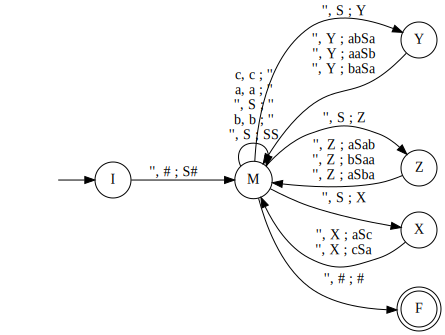

In [11]:
pda2 = md2mc('''
PDA 

I : '', # ; S# -> M

M : '', S ; X -> X
M : '', S ; Y -> Y
M : '', S ; Z -> Z
M : '', S ; SS -> M
M : '', S ; '' -> M

X : '', X ; aSc -> M
X : '', X ; cSa -> M

Y : '', Y ; aaSb -> M
Y : '', Y ; abSa -> M
Y : '', Y ; baSa -> M

Z : '', Z ; bSaa -> M
Z : '', Z ; aSab -> M
Z : '', Z ; aSba -> M

M : a, a ; '' -> M
M : b, b ; '' -> M
M : c, c ; '' -> M

M : '', # ; # -> F

''')
DOpda2 = dotObj_pda(pda2, FuseEdges=True)
DOpda2

My Tests:

In [12]:
explore_pda("", pda2, STKMAX=2)

String  accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '', '#')
->  ('M', '', 'S#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [13]:
explore_pda("aaabc", pda2, STKMAX=5)

String aaabc accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aaabc', '#')
->  ('M', 'aaabc', 'S#')
->  ('X', 'aaabc', 'X#')
->  ('M', 'aaabc', 'aSc#')
->  ('M', 'aabc', 'Sc#')
->  ('Y', 'aabc', 'Yc#')
->  ('M', 'aabc', 'aaSbc#')
->  ('M', 'abc', 'aSbc#')
->  ('M', 'bc', 'Sbc#')
->  ('M', 'bc', 'bc#')
->  ('M', 'c', 'c#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aaabc', '#')
->  ('M', 'aaabc', 'S#')
->  ('X', 'aaabc', 'X#')
->  ('M', 'aaabc', 'aSc#')
->  ('M', 'aabc', 'Sc#')
->  ('Z', 'aabc', 'Zc#')
->  ('M', 'aabc', 'aSabc#')
->  ('M', 'abc', 'Sabc#')
->  ('M', 'abc', 'abc#')
->  ('M', 'bc', 'bc#')
->  ('M', 'c', 'c#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [14]:
explore_pda("bbbaaaaaa", pda2, STKMAX=5)

String bbbaaaaaa accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'bbbaaaaaa', '#')
->  ('M', 'bbbaaaaaa', 'S#')
->  ('Z', 'bbbaaaaaa', 'Z#')
->  ('M', 'bbbaaaaaa', 'bSaa#')
->  ('M', 'bbaaaaaa', 'Saa#')
->  ('Z', 'bbaaaaaa', 'Zaa#')
->  ('M', 'bbaaaaaa', 'bSaaaa#')
->  ('M', 'baaaaaa', 'Saaaa#')
->  ('Y', 'baaaaaa', 'Yaaaa#')
->  ('M', 'baaaaaa', 'baSaaaaa#')
->  ('M', 'aaaaaa', 'aSaaaaa#')
->  ('M', 'aaaaa', 'Saaaaa#')
->  ('M', 'aaaaa', 'aaaaa#')
->  ('M', 'aaaa', 'aaaa#')
->  ('M', 'aaa', 'aaa#')
->  ('M', 'aa', 'aa#')
->  ('M', 'a', 'a#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'bbbaaaaaa', '#')
->  ('M', 'bbbaaaaaa', 'S#')
->  ('Z', 'bbbaaaaaa', 'Z#')
->  ('M', 'bbbaaaaaa', 'bSaa#')
->  ('M', 'bbaaaaaa', 'Saa#')
->  ('Z', 'bbaaaaaa', 'Zaa#')
->  ('M', 'bbaaaaaa', 'bSaaaa#')
->  ('M', 'baaaaaa', 'Saaaa#')
->  ('Z', 'baaaaaa', 'Zaaaa#')
->  ('M', 'baaaaaa', 'bS

In [15]:
explore_pda("aaccbbaaaa", pda2, STKMAX=5)

String aaccbbaaaa accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aaccbbaaaa', '#')
->  ('M', 'aaccbbaaaa', 'S#')
->  ('M', 'aaccbbaaaa', 'SS#')
->  ('X', 'aaccbbaaaa', 'XS#')
->  ('M', 'aaccbbaaaa', 'aScS#')
->  ('M', 'accbbaaaa', 'ScS#')
->  ('X', 'accbbaaaa', 'XcS#')
->  ('M', 'accbbaaaa', 'aSccS#')
->  ('M', 'ccbbaaaa', 'SccS#')
->  ('M', 'ccbbaaaa', 'ccS#')
->  ('M', 'cbbaaaa', 'cS#')
->  ('M', 'bbaaaa', 'S#')
->  ('Z', 'bbaaaa', 'Z#')
->  ('M', 'bbaaaa', 'bSaa#')
->  ('M', 'baaaa', 'Saa#')
->  ('Y', 'baaaa', 'Yaa#')
->  ('M', 'baaaa', 'baSaaa#')
->  ('M', 'aaaa', 'aSaaa#')
->  ('M', 'aaa', 'Saaa#')
->  ('M', 'aaa', 'aaa#')
->  ('M', 'aa', 'aa#')
->  ('M', 'a', 'a#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aaccbbaaaa', '#')
->  ('M', 'aaccbbaaaa', 'S#')
->  ('M', 'aaccbbaaaa', 'SS#')
->  ('X', 'aaccbbaaaa', 'XS#')
->  ('M', 'aaccbbaaaa', 'aScS#')
->  ('M', 

Required Tests:

In [16]:
explore_pda("", pda2, STKMAX=4)

String  accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '', '#')
->  ('M', '', 'S#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [17]:
explore_pda("aabbaa", pda2, STKMAX=6)

String aabbaa accepted by your PDA in 4 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aabbaa', '#')
->  ('M', 'aabbaa', 'S#')
->  ('M', 'aabbaa', 'SS#')
->  ('Y', 'aabbaa', 'YS#')
->  ('M', 'aabbaa', 'aaSbS#')
->  ('M', 'abbaa', 'aSbS#')
->  ('M', 'bbaa', 'SbS#')
->  ('M', 'bbaa', 'bS#')
->  ('M', 'baa', 'S#')
->  ('Y', 'baa', 'Y#')
->  ('M', 'baa', 'baSa#')
->  ('M', 'aa', 'aSa#')
->  ('M', 'a', 'Sa#')
->  ('M', 'a', 'a#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aabbaa', '#')
->  ('M', 'aabbaa', 'S#')
->  ('M', 'aabbaa', 'SS#')
->  ('Y', 'aabbaa', 'YS#')
->  ('M', 'aabbaa', 'aaSbS#')
->  ('M', 'abbaa', 'aSbS#')
->  ('M', 'bbaa', 'SbS#')
->  ('M', 'bbaa', 'bS#')
->  ('M', 'baa', 'S#')
->  ('Z', 'baa', 'Z#')
->  ('M', 'baa', 'bSaa#')
->  ('M', 'aa', 'Saa#')
->  ('M', 'aa', 'aa#')
->  ('M', 'a', 'a#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:

In [18]:
explore_pda("acacacac", pda2, STKMAX=6)

String acacacac accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'acacacac', '#')
->  ('M', 'acacacac', 'S#')
->  ('X', 'acacacac', 'X#')
->  ('M', 'acacacac', 'aSc#')
->  ('M', 'cacacac', 'Sc#')
->  ('X', 'cacacac', 'Xc#')
->  ('M', 'cacacac', 'cSac#')
->  ('M', 'acacac', 'Sac#')
->  ('X', 'acacac', 'Xac#')
->  ('M', 'acacac', 'aScac#')
->  ('M', 'cacac', 'Scac#')
->  ('X', 'cacac', 'Xcac#')
->  ('M', 'cacac', 'cSacac#')
->  ('M', 'acac', 'Sacac#')
->  ('M', 'acac', 'acac#')
->  ('M', 'cac', 'cac#')
->  ('M', 'ac', 'ac#')
->  ('M', 'c', 'c#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [19]:
explore_pda("ababaacacaca", pda2, STKMAX=6)

String ababaacacaca accepted by your PDA in 6 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'ababaacacaca', '#')
->  ('M', 'ababaacacaca', 'S#')
->  ('Y', 'ababaacacaca', 'Y#')
->  ('M', 'ababaacacaca', 'abSa#')
->  ('M', 'babaacacaca', 'bSa#')
->  ('M', 'abaacacaca', 'Sa#')
->  ('M', 'abaacacaca', 'SSa#')
->  ('Y', 'abaacacaca', 'YSa#')
->  ('M', 'abaacacaca', 'abSaSa#')
->  ('M', 'baacacaca', 'bSaSa#')
->  ('M', 'aacacaca', 'SaSa#')
->  ('M', 'aacacaca', 'aSa#')
->  ('M', 'acacaca', 'Sa#')
->  ('X', 'acacaca', 'Xa#')
->  ('M', 'acacaca', 'aSca#')
->  ('M', 'cacaca', 'Sca#')
->  ('X', 'cacaca', 'Xca#')
->  ('M', 'cacaca', 'cSaca#')
->  ('M', 'acaca', 'Saca#')
->  ('X', 'acaca', 'Xaca#')
->  ('M', 'acaca', 'aScaca#')
->  ('M', 'caca', 'Scaca#')
->  ('M', 'caca', 'caca#')
->  ('M', 'aca', 'aca#')
->  ('M', 'ca', 'ca#')
->  ('M', 'a', 'a#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'ababaaca

In [20]:
explore_pda("acabacabacabaaa", pda2, STKMAX=6)

String acabacabacabaaa accepted by your PDA in 14 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'acabacabacabaaa', '#')
->  ('M', 'acabacabacabaaa', 'S#')
->  ('M', 'acabacabacabaaa', 'SS#')
->  ('Z', 'acabacabacabaaa', 'ZS#')
->  ('M', 'acabacabacabaaa', 'aSbaS#')
->  ('M', 'cabacabacabaaa', 'SbaS#')
->  ('X', 'cabacabacabaaa', 'XbaS#')
->  ('M', 'cabacabacabaaa', 'cSabaS#')
->  ('M', 'abacabacabaaa', 'SabaS#')
->  ('M', 'abacabacabaaa', 'abaS#')
->  ('M', 'bacabacabaaa', 'baS#')
->  ('M', 'acabacabaaa', 'aS#')
->  ('M', 'cabacabaaa', 'S#')
->  ('M', 'cabacabaaa', 'SS#')
->  ('X', 'cabacabaaa', 'XS#')
->  ('M', 'cabacabaaa', 'cSaS#')
->  ('M', 'abacabaaa', 'SaS#')
->  ('M', 'abacabaaa', 'aS#')
->  ('M', 'bacabaaa', 'S#')
->  ('Y', 'bacabaaa', 'Y#')
->  ('M', 'bacabaaa', 'baSa#')
->  ('M', 'acabaaa', 'aSa#')
->  ('M', 'cabaaa', 'Sa#')
->  ('X', 'cabaaa', 'Xa#')
->  ('M', 'cabaaa', 'cSaa#')
->  ('M', 'abaaa', 'Saa#')
->  ('Y', 'abaaa', 'Yaa#')
-

Confirming inputs from Q5 are not excepted

In [26]:
explore_pda("baac", pda2, STKMAX=6)

String baac rejected by your PDA :-(
Visited states are:
{('Z', 'baac', 'Z#'), ('M', 'aac', 'SSaaS#'), ('M', 'ac', 'baaaS#'), ('M', '', 'aSbaSa#'), ('M', 'baac', 'SSSS#'), ('X', 'c', 'XScaS#'), ('X', 'c', 'X#'), ('M', '', 'aSbaaS#'), ('M', 'aac', 'abSaSaa#'), ('Z', '', 'ZSSSa#'), ('M', 'c', 'SScaS#'), ('M', 'c', 'caS#'), ('M', 'c', 'SScSa#'), ('Z', 'c', 'ZbaaS#'), ('Z', 'aac', 'ZSSaa#'), ('X', '', 'XSaca#'), ('Z', 'ac', 'ZScaa#'), ('M', 'aac', 'aaS#'), ('M', 'ac', 'bSaaSa#'), ('M', 'ac', 'aScSaS#'), ('Z', 'aac', 'ZSSSaaS#'), ('M', '', 'SSSSaS#'), ('Y', 'ac', 'YScaa#'), ('M', 'ac', 'aScaS#'), ('Y', 'ac', 'YScaaS#'), ('M', 'baac', 'aaSb#'), ('Y', 'baac', 'YS#'), ('X', '', 'XaSS#'), ('M', '', 'SaSS#'), ('Y', 'ac', 'YSSaS#'), ('X', 'c', 'XSaba#'), ('M', 'baac', 'SSSSS#'), ('M', '', 'SSSSa#'), ('Y', 'c', 'YcSSa#'), ('M', '', 'SSaS#'), ('M', 'c', 'SbSaa#'), ('M', 'c', 'aSc#'), ('Y', 'c', 'YbaSa#'), ('X', 'c', 'Xaba#'), ('M', 'c', 'bSaa#'), ('X', 'c', 'XSSS#'), ('M', '', 'aSaba#'), ('Z', 'ac'

In [22]:
explore_pda("abacabbcbccccbaaaaaaaa", pda2, STKMAX=6)

String abacabbcbccccbaaaaaaaa rejected by your PDA :-(
Visited states are:
{('M', 'aaaaaaaa', 'cSaSaaaSaaaaaaaaaa#'), ('X', 'acabbcbccccbaaaaaaaa', 'XSSSaS#'), ('M', 'baaaaaaaa', 'cSaaaaaaaaSaaaa#'), ('X', 'a', 'XSabaaaaaaa#'), ('M', 'ccccbaaaaaaaa', 'cSaaaaaaaaS#'), ('Z', 'cbaaaaaaaa', 'ZSSaSaaaaSaaaaa#'), ('Z', 'ccbaaaaaaaa', 'ZaSaaaSaaaaa#'), ('X', 'aaaaaaa', 'XbaaaaaaaSaaaaaaa#'), ('X', 'aa', 'XSSSSaaaaaaa#'), ('X', 'baaaaaaaa', 'XSaaSaaaaaaaaSa#'), ('Z', 'aaaaaaa', 'ZcaaSaaaaaaaaaaa#'), ('X', 'baaaaaaaa', 'XaaaaaaSaaaaa#'), ('M', 'cccbaaaaaaaa', 'SSSaaaaSaaaa#'), ('Y', 'bacabbcbccccbaaaaaaaa', 'YSSSba#'), ('Z', 'baaaaaaaa', 'ZaaaaSaaaaaaaS#'), ('M', 'cbaaaaaaaa', 'aSaaaaaaaaa#'), ('M', 'aaaaaaa', 'aSbaaaaaaaaaaaaSa#'), ('M', 'cbaaaaaaaa', 'SSaaSaaaaaaaSa#'), ('Z', 'abacabbcbccccbaaaaaaaa', 'ZSSSS#'), ('Z', 'ccbaaaaaaaa', 'ZSSSaaaaaSaaaa#'), ('M', 'bacabbcbccccbaaaaaaaa', 'baSacS#'), ('Z', 'aaaaaa', 'Zabaaaaaaaaaaaa#'), ('Y', 'aaaaaaaa', 'YSSaaaaaaaaaaaaaS#'), ('M', 'aaaaaaa', 'Sca

In [23]:
explore_pda("aaaabaacabbcbccccbaaaa", pda2, STKMAX=6)

String aaaabaacabbcbccccbaaaa rejected by your PDA :-(
Visited states are:
{('M', 'aaa', 'aScSaaaaaaaSa#'), ('M', 'bbcbccccbaaaa', 'bb#'), ('X', 'a', 'XSabaaaaaaa#'), ('Y', 'baacabbcbccccbaaaa', 'YScabcc#'), ('Y', 'cabbcbccccbaaaa', 'YScabb#'), ('Z', 'cabbcbccccbaaaa', 'ZabSbc#'), ('Y', 'abaacabbcbccccbaaaa', 'YSSccab#'), ('Y', 'aacabbcbccccbaaaa', 'YSaccc#'), ('M', 'cccbaaaa', 'aSabaaaaS#'), ('Z', 'cccbaaaa', 'ZSSSaaaa#'), ('M', 'baaaa', 'aSaSaaaaa#'), ('Z', 'ccbaaaa', 'ZSSSaaSaaa#'), ('X', 'aa', 'XSSSSaaaaaaa#'), ('M', 'baaaa', 'SaSaaaSaaa#'), ('Z', 'baacabbcbccccbaaaa', 'ZScbabS#'), ('M', 'acabbcbccccbaaaa', 'cSaabb#'), ('Z', 'ccbaaaa', 'ZSSSaaaaaS#'), ('X', 'baacabbcbccccbaaaa', 'XSabccc#'), ('M', 'bbcbccccbaaaa', 'cSaSSbb#'), ('Z', 'bccccbaaaa', 'ZSSaSS#'), ('Y', 'baaaa', 'Yaaaaaaa#'), ('Y', 'cbaaaa', 'YSSaSaaaaaS#'), ('M', 'bbcbccccbaaaa', 'aSabbb#'), ('Y', 'aaa', 'YbaaaaaaaaaSa#'), ('Y', 'ccbaaaa', 'YSSSaaSaaa#'), ('M', 'bbcbccccbaaaa', 'bSacSb#'), ('M', 'ccbaaaa', 'cSaaaSSaaa#'

6 was the largest value here for STKMAX that seemed to finish in a reasonable amount of time, hopefully it is sufficient